# WordCloud Creation

## Imports and Global Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
sns.set(font='sans-serif')

## Load Data

In [4]:
# Import the data loading function
import sys
sys.path.append('..')
from src.data.preprocessing import load_fraud_data

# Load training data only (avoid data leakage)
data = load_fraud_data("train_data")

# Create is_fraud target from acct_type (needed for wordclouds)
fraud_labels = ['fraudster_event', 'fraudster', 'fraudster_att']
data['is_fraud'] = data['acct_type'].apply(lambda x: 'Fraud' if x in fraud_labels else 'Not Fraud')

text_columns = ["description", "name", "org_desc", "org_name", "is_fraud"]
df_text = data.loc[:, text_columns].copy()

## Convert Html to Normal Text String

In [5]:
df_text['desc_soup'] = df_text['description'].apply(lambda x: BeautifulSoup(x, 'html.parser'))
df_text['desc_clean'] = df_text['desc_soup'].apply(lambda x: x.get_text("|", strip=True))

In [6]:
df_fraud = df_text[df_text.is_fraud == "Fraud"]
df_not_fraud = df_text[df_text.is_fraud == "Not Fraud"]

In [7]:
fraud_text_desc = " ".join(review for review in df_fraud.desc_clean)
fraud_text_name = " ".join(review for review in df_fraud.name)
non_fraud_text_desc = " ".join(review for review in df_not_fraud.desc_clean)
non_fraud_text_name = " ".join(review for review in df_not_fraud.name)

## Set Up Stopwords

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["Unknown", "January", "February", "March",
                  "April", "May", "June", "July", "August",
                  "September", "October", "November", "December",
                  "PM", "AM", "Friday", "Saturday", "br", "W", "2nd",
                  "3rd", "30pm", "St", "E", "1st", "U", "s", "day",
                  "will", "le", "de", "ticket", "event", "one",
                  "night", "new", "tickets", "us", 'la', "et",
                  "les", "des", "time", "à", "du"])

## Event Description

#### Make Wordclouds

In [9]:
non_fraud_wordcloud_desc = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(non_fraud_text_desc)

In [10]:
fraud_wordcloud_desc = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fraud_text_desc)

#### Show and Save Wordclouds

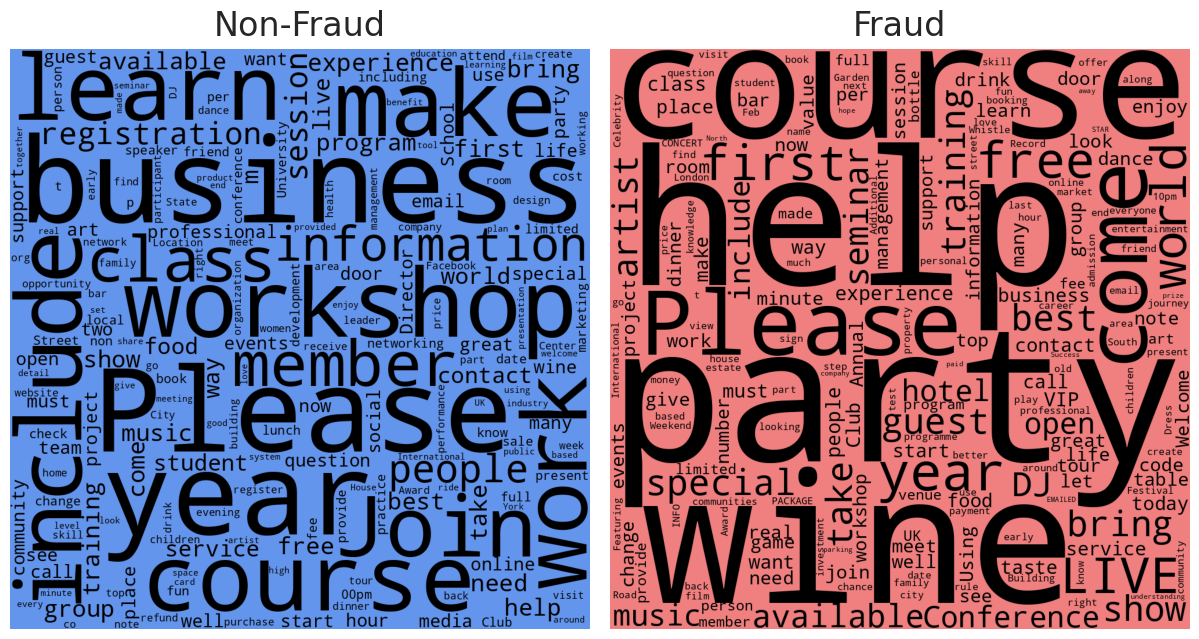

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(non_fraud_wordcloud_desc)
ax1.axis("off")
ax1.set_title("Non-Fraud", fontsize=24, pad=10)


ax2.imshow(fraud_wordcloud_desc)
ax2.axis("off")
ax2.set_title("Fraud", fontsize=24, pad=10)

fig.tight_layout(pad=0)

plt.savefig('../images/description_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## Event Name

#### Make Wordclouds

In [13]:
non_fraud_wordcloud_name = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(non_fraud_text_name)

In [14]:
fraud_wordcloud_name = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fraud_text_name)

#### Show and Save Wordclouds

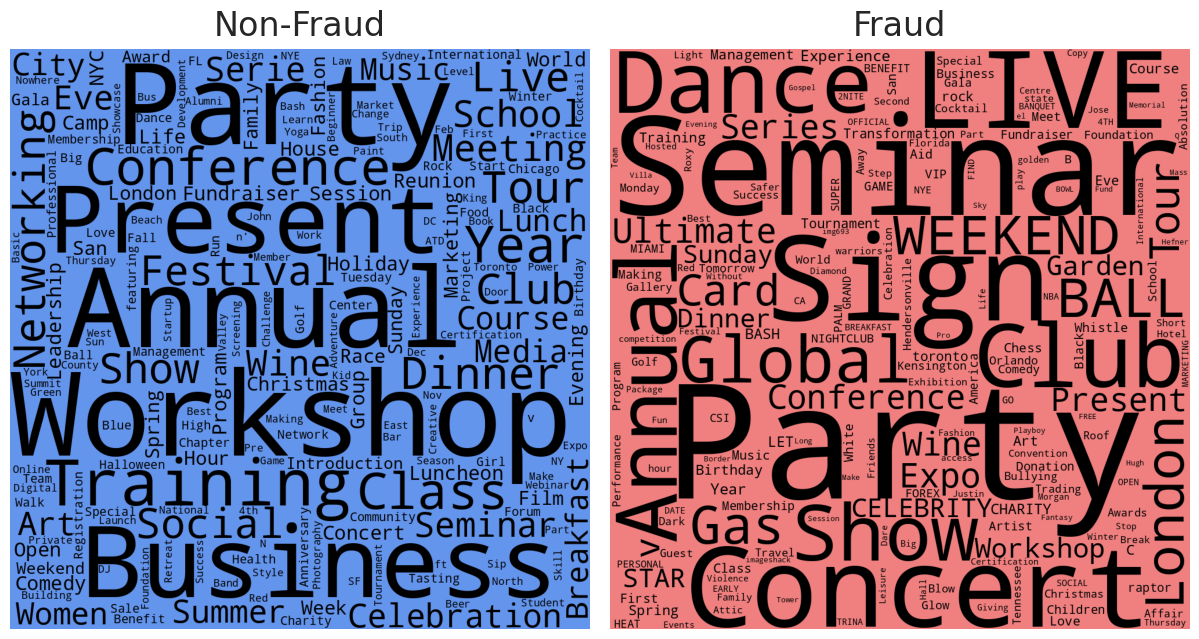

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(non_fraud_wordcloud_name)
ax1.axis("off")
ax1.set_title("Non-Fraud", fontsize=24, pad=10)


ax2.imshow(fraud_wordcloud_name)
ax2.axis("off")
ax2.set_title("Fraud", fontsize=24, pad=10)

fig.tight_layout(pad=0)

plt.savefig('../images/name_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()